In [35]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
import seaborn as sns
import numpy as np


In [14]:
dataset, info = tfds.load("tf_flowers", split="train", as_supervised=True, with_info=True)
num_classes = info.features['label'].num_classes

In [15]:
def preprocess(image, label):
    image = tf.image.resize(image, (128, 128)) / 255.0
    return image, label

In [16]:
dataset = dataset.map(preprocess).batch(32).shuffle(1000)

In [17]:
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])


In [18]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [19]:
history = model.fit(dataset, epochs=10)

Epoch 1/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 117s 923ms/step - accuracy: 0.3586 - loss: 1.5677
Epoch 2/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 97s 826ms/step - accuracy: 0.6058 - loss: 0.9908
Epoch 3/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 139s 810ms/step - accuracy: 0.7153 - loss: 0.7591
Epoch 4/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 141s 795ms/step - accuracy: 0.8465 - loss: 0.4671
Epoch 5/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 90s 769ms/step - accuracy: 0.9309 - loss: 0.2342
Epoch 6/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 101s 869ms/step - accuracy: 0.9756 - loss: 0.1003
Epoch 7/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 132s 782ms/step - accuracy: 0.9889 - loss: 0.0542
Epoch 8/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 93s 799ms/step - accuracy: 0.9963 - loss: 0.0305
Epoch 9/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 144s 812ms/step - accuracy: 0.9847 - loss: 0.0508
Epoch 10/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 97s 833ms/step - accuracy: 0.9986 - loss: 0.0104


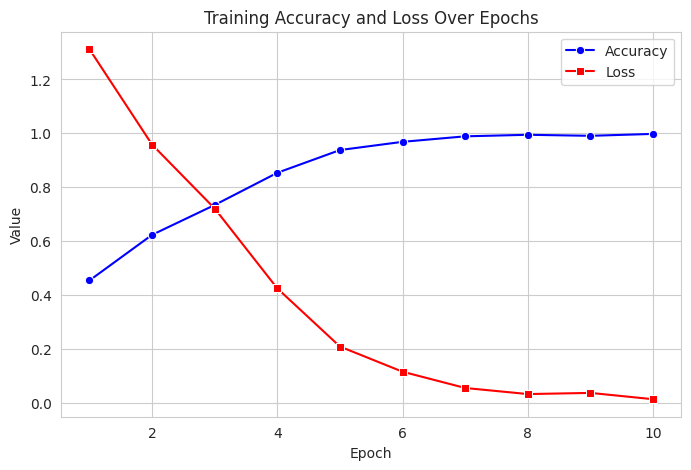

In [24]:
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
sns.lineplot(x=range(1, 11), y=history.history['accuracy'], marker='o', label='Accuracy', color='b')
sns.lineplot(x=range(1, 11), y=history.history['loss'], marker='s', label='Loss', color='r')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Training Accuracy and Loss Over Epochs')
plt.legend()
plt.show()

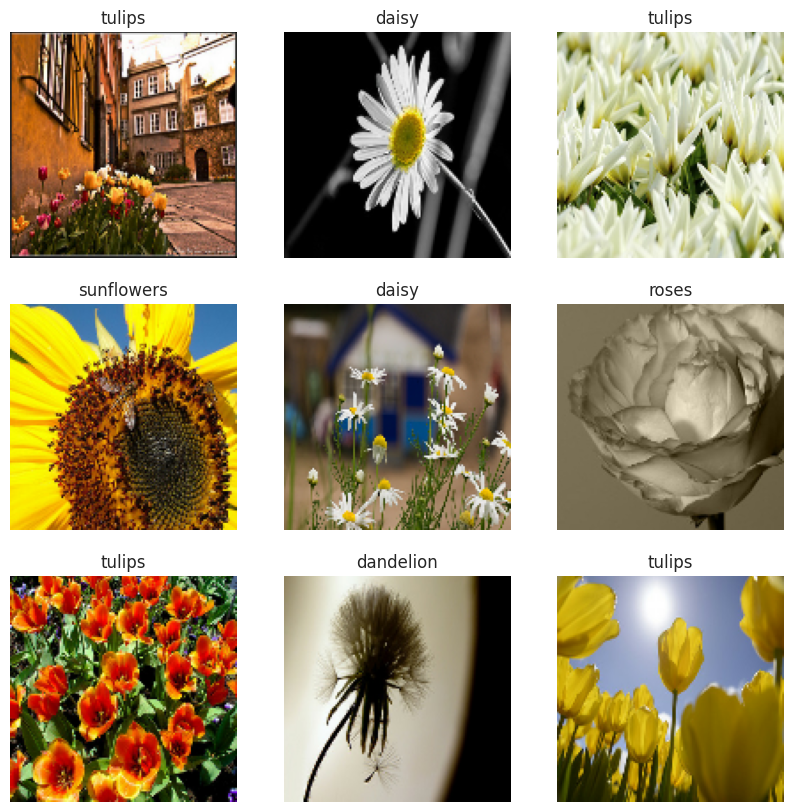

In [41]:
#picture of flower
class_names = info.features['label'].names
plt.figure(figsize=(10, 10))
sample_dataset = dataset.unbatch().take(9)
for i, (image, label) in enumerate(sample_dataset):
    plt.subplot(3, 3, i + 1)
    plt.imshow(image)
    plt.title(class_names[label.numpy()])
    plt.axis("off")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


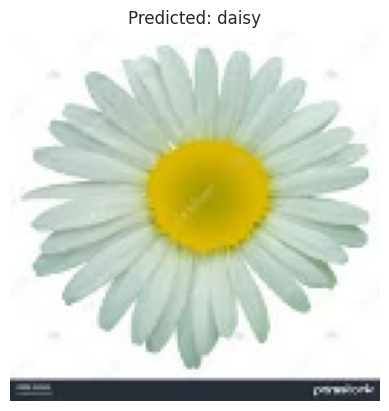

In [39]:
#testing model

def predict_image(image_path):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, (128, 128)) / 255.0
    image = tf.expand_dims(image, axis=0)  # اضافه کردن بعد دسته‌ای
    prediction = model.predict(image)
    predicted_class = np.argmax(prediction)
    plt.imshow(image[0])
    plt.title(f'Predicted: {class_names[predicted_class]}')
    plt.axis("off")
    plt.show()
predict_image("/content/daysi.jpg")